In [1]:


# maths library for matrix manipulation
import numpy as np

# matplotlib is a library for plotting things inside Python
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# This is a library for reading and writing image files

from skimage import io

In [3]:
# a library for finding files


import glob 

In [4]:


JPGList = glob.glob('/home/impett/Downloads/Annunc2/AnnuncsJun18/*/*.jpg')




In [5]:
len(JPGList)

505

In [13]:
allList = JPGList #[:100]

In [14]:
# allList is the list of all image file names

len(allList)

505

In [15]:
from skimage import feature

In [16]:
from skimage import transform

In [17]:
import tqdm

In [18]:
from scipy.spatial import distance

In [ ]:
# allImageSections = []
imCrops = []
imageFeatureSections = []

for fileName in tqdm.tqdm(allList):
    im = io.imread(fileName)
    
    for j in range(100):
        myshape = np.shape(im)
        w = myshape[0]
        h = myshape[1]
        size = np.random.randint(low=50,high=51)
        minw = np.random.randint(w - size)
        maxw = np.random.randint(h - size)

        newim = im[minw:minw+size,maxw:maxw+size,:]
        imr = transform.resize(newim,(256,256))
#         allImageSections.append(imr)
        F = feature.hog(imr,  pixels_per_cell=(16,16)  )
        imageFeatureSections.append(F)
        imCrops.append([fileName, minw,minw+size,maxw,maxw+size])


  0%|          | 0/505 [00:00<?, ?it/s]/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)

  4%|▍         | 21/505 [01:27<33:30,  4.15s/it]

In [94]:
len(imageFeatureSections)

6128

In [95]:
def showImSection(mylist):
    myim = io.imread(mylist[0])
    return myim[mylist[1]:mylist[2],mylist[3]:mylist[4]]

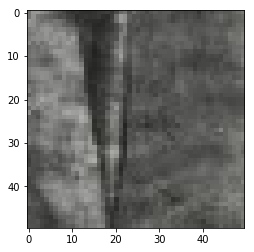

In [96]:
plt.imshow(showImSection(imCrops[3]))

In [97]:
from sklearn import decomposition

In [98]:
from scipy.spatial import distance

In [99]:
imf = np.asarray(imageFeatureSections)

In [100]:
mypca = decomposition.PCA(n_components=50)

In [101]:
imf_pca = mypca.fit_transform(imf)

In [102]:
np.shape(imf_pca)

(6128, 50)

In [103]:
mydistances = distance.squareform(distance.pdist(imf_pca))

433


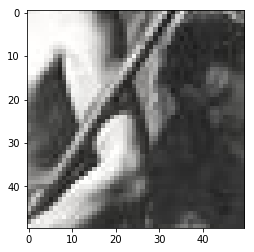

In [161]:
search_im = np.random.randint(low=0,high=1000)
# search_im = 533
plt.imshow(showImSection(imCrops[search_im]))
print(search_im)

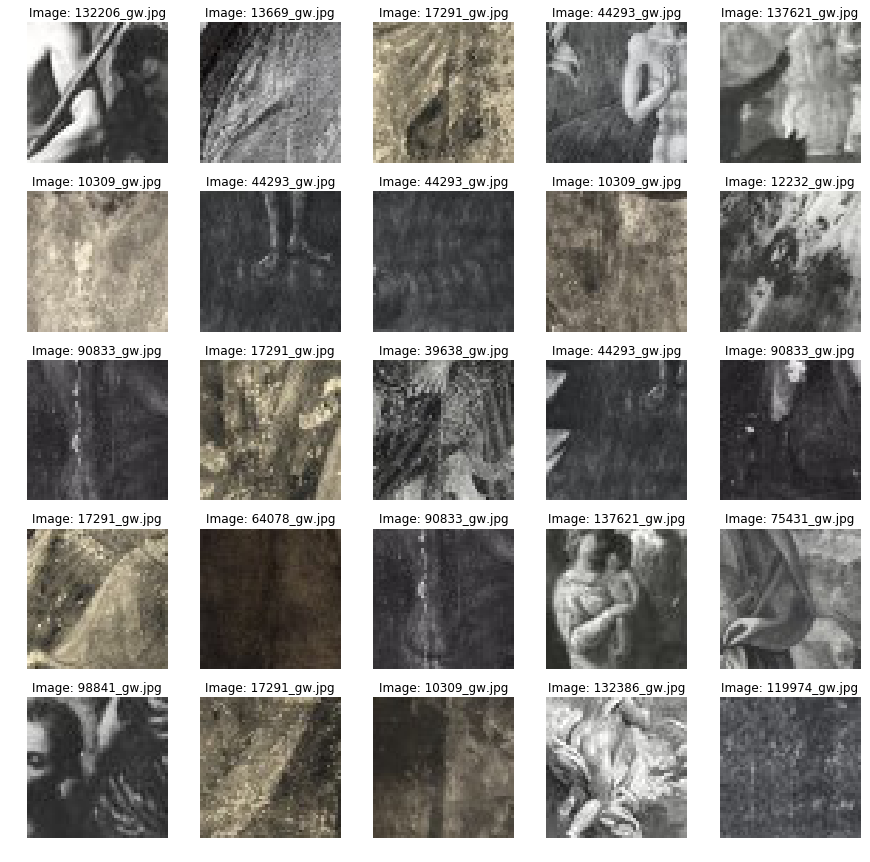

In [162]:
plt.figure(figsize=(15,15))
idx = np.argsort(mydistances[search_im,:])
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow( showImSection(imCrops[idx[i]]))
    plt.axis('off')
#     plt.title('Distance: ' + str(mydistances[search_im,idx[i]]))
    plt.title('Image: ' + str(imCrops[idx[i]][0].split('/')[-1]))

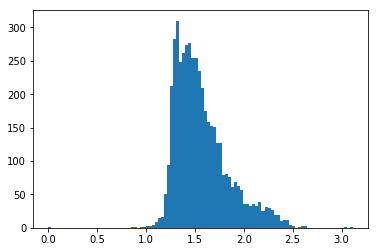

In [29]:
plt.hist(mydistances[search_im,:],100);

In [31]:
testIm = io.imread(allList[5])

<IPython.core.display.Javascript object>


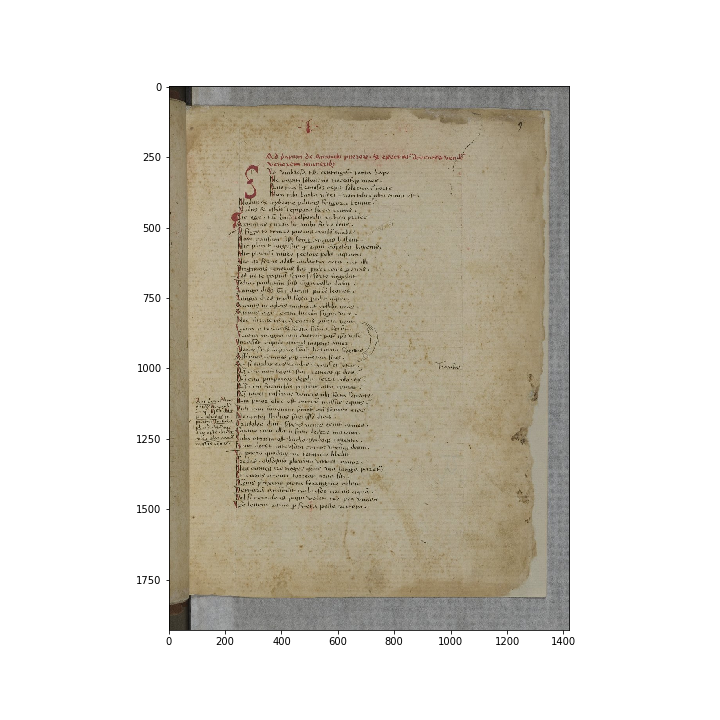

In [33]:
%matplotlib nbagg
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(testIm)
coords = []
def onclick(event):
    coords.append( [event.xdata, event.ydata])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [34]:
xmin = int(coords[0][0])
ymin = int(coords[0][1])
xmax = int(coords[1][0])
ymax = int(coords[1][1])

In [35]:
[xmin, xmax, ymin, ymax]

[220, 437, 196, 476]

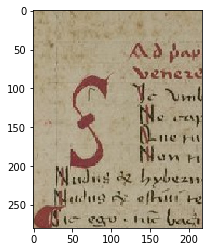

In [36]:
%matplotlib inline
plt.imshow(testIm[ymin:ymax,xmin:xmax,:])

In [37]:
queryIm = testIm[ymin:ymax,xmin:xmax,:]
queryIm = transform.resize(queryIm,(256,256,3))
queryF = feature.hog(queryIm,  pixels_per_cell=(16,16)  )

/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


In [38]:
# querydistances = distance.cdist(imf,queryF.reshape(1,-1))

qf_pca = mypca.transform(queryF.reshape(1,-1))
querydistances = distance.cdist(imf_pca,qf_pca)

In [39]:
np.shape(imf)

(4800, 15876)

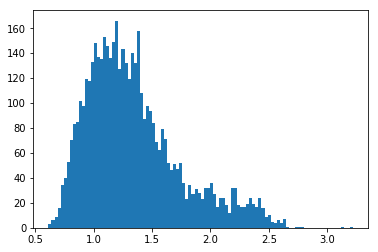

In [40]:
plt.hist(querydistances,100);

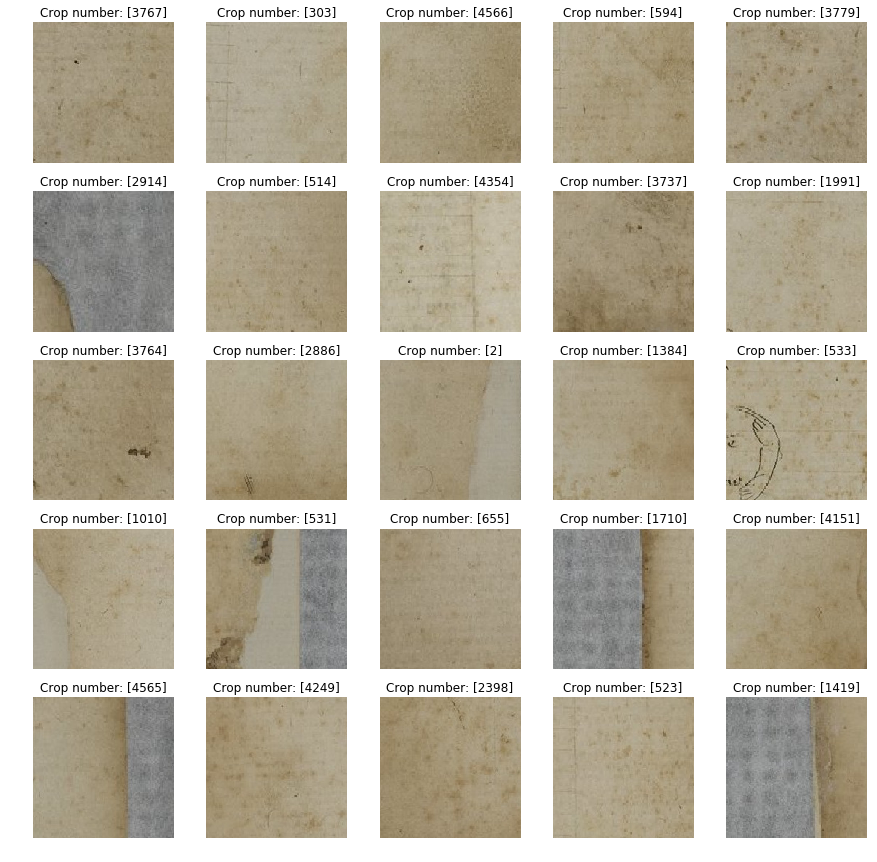

In [47]:
plt.figure(figsize=(15,15))
idx = np.argsort(querydistances,axis=0)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow( showImSection(imCrops[  [idx[i][0]][0]      ]))
    plt.axis('off')
#     plt.title('distance = ' + str(querydistances[idx[i][0]]))
    plt.title('Crop number: ' + str(idx[i]))